In [170]:
import cv2
import sys
import pandas as pd
import numpy as np
from PIL import Image

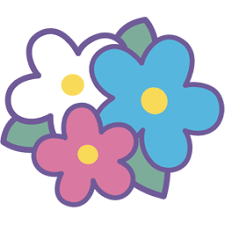

In [171]:
image = Image.open('flowers.png').convert('RGB')
image

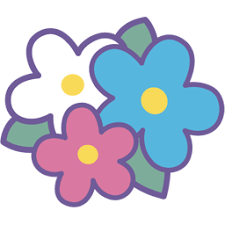

In [172]:
image = Image.open('flowers.png').convert('RGB')
result = image.convert('P', palette=Image.ADAPTIVE, colors=150)
result

In [173]:
# Make into Numpy array
na = np.array(result)
# Arrange all pixels into a tall column of 3 RGB values and find unique rows (colours)
colours, counts = np.unique(na.reshape(-1,3), axis=0, return_counts=1)
print(colours.shape)
print(colours)
print(counts)

(1648, 3)
[[  0   0   0]
 [  0   0   1]
 [  0   0   2]
 ...
 [106 106 104]
 [106 106 105]
 [106 106 106]]
[8274    1   29 ...    1    1    4]


In [174]:
import csv
from scipy import spatial as sp

DMC_CSV = "dmc.csv"

dmc_colors = []
with open(DMC_CSV, newline="") as csvfile:
    reader = csv.DictReader(csvfile)
    for index, row in enumerate(reader):
        dmc_colors.append(
            {
                "index": index,
                "floss": "#" + row["floss#"],
                "description": row["description"],
                "red": int(row["red"]),
                "green": int(row["green"]),
                "blue": int(row["blue"]),
                "hex": "#" + row["hex"],
                "dmc_row": row["row"],
            }
        )
rgb_colors = []
for color in dmc_colors:
    rgb_colors.append((color["red"], color["green"], color["blue"]))
# print(dmc_colors)

In [175]:
def rgb_to_dmc(r, g, b):
    tree = sp.KDTree(rgb_colors)
    # don't need the Euclidean distance only the index
    _, result = tree.query((r, g, b))
    return dmc_colors[result]

In [176]:
rgb_to_dmc(14,14,12)

{'index': 407,
 'floss': '#3371',
 'description': 'Black Brown',
 'red': 30,
 'green': 17,
 'blue': 8,
 'hex': '#1E1108',
 'dmc_row': 'row 17-18'}

In [177]:
colours_list = [(rgb_to_dmc(element[0], element[1], element[2])) for element in colours]
print(len(colours_list))
colours_list

1648


[{'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'ind

In [178]:
unique_colours_list = [dict(t) for t in {tuple(d.items()) for d in colours_list}]
len(unique_colours_list)

49

In [179]:
# from collections import Counter
# data = Counter(colours_list)
# data.most_common()   # Returns all unique items and their counts
# data.most_common(1)  # Returns the highest occurring item

seq = [x['floss'] for x in colours_list]

print(len(seq))
print(seq)

1648
['#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#939', '#939', '#939', '#939', '#939', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#939', '#939', '#939', '#939', '#939', '#310', '#310', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#310', '#310', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#310', '#310', '#310', '#310', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#310', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#939', '#820', '#820', '#939', '#939', '#939', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#820', '#796', '#796', '#796', '#796', '#796', '#796', '#796', '#796', '#796', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#939', '#310', '#310', '#310', '#310', '#939', '#820', '#820', '#820', '#820', '#796', '#796', '#796', '#796', '#796', '#796', '#796', '#796', '#310', '#310', '#310', '#

In [180]:
# https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter
floss_counts = Counter(seq)
floss_counts

Counter({'#310': 72,
         '#939': 121,
         '#820': 29,
         '#796': 38,
         '#3371': 92,
         '#500': 4,
         '#311': 51,
         '#910': 6,
         '#890': 5,
         '#823': 11,
         '#938': 53,
         '#934': 82,
         '#3750': 82,
         '#3799': 77,
         '#501': 14,
         '#3808': 13,
         '#986': 3,
         '#3031': 48,
         '#930': 44,
         '#791': 18,
         '#898': 21,
         '#935': 1,
         '#844': 15,
         '#3815': 3,
         '#154': 33,
         '#158': 14,
         '#413': 41,
         '#924': 89,
         '#3021': 8,
         '#309': 12,
         '#838': 73,
         '#801': 23,
         '#814': 2,
         '#535': 146,
         '#839': 32,
         '#3787': 42,
         '#779': 15,
         '#936': 8,
         '#3051': 36,
         '#937': 13,
         '#300': 44,
         '#904': 18,
         '#3362': 14,
         '#433': 15,
         '#645': 20,
         '#317': 41,
         '#520': 2,
         '#

In [181]:
floss_counts.most_common()

[('#535', 146),
 ('#939', 121),
 ('#3371', 92),
 ('#924', 89),
 ('#934', 82),
 ('#3750', 82),
 ('#3799', 77),
 ('#838', 73),
 ('#310', 72),
 ('#938', 53),
 ('#311', 51),
 ('#3031', 48),
 ('#930', 44),
 ('#300', 44),
 ('#3787', 42),
 ('#413', 41),
 ('#317', 41),
 ('#796', 38),
 ('#3051', 36),
 ('#154', 33),
 ('#839', 32),
 ('#820', 29),
 ('#801', 23),
 ('#898', 21),
 ('#645', 20),
 ('#791', 18),
 ('#904', 18),
 ('#844', 15),
 ('#779', 15),
 ('#433', 15),
 ('#501', 14),
 ('#158', 14),
 ('#3362', 14),
 ('#3808', 13),
 ('#937', 13),
 ('#309', 12),
 ('#823', 11),
 ('#3021', 8),
 ('#936', 8),
 ('#910', 6),
 ('#890', 5),
 ('#500', 4),
 ('#986', 3),
 ('#3815', 3),
 ('#3781', 3),
 ('#814', 2),
 ('#520', 2),
 ('#935', 1),
 ('#3802', 1)]

In [182]:
floss_use_percentage = [
    (i, floss_counts[i] / len(colours) * 100.0)
    for i  in floss_counts]
floss_use_percentage

[('#310', 4.368932038834951),
 ('#939', 7.342233009708737),
 ('#820', 1.7597087378640777),
 ('#796', 2.3058252427184467),
 ('#3371', 5.582524271844661),
 ('#500', 0.24271844660194172),
 ('#311', 3.0946601941747574),
 ('#910', 0.3640776699029126),
 ('#890', 0.30339805825242716),
 ('#823', 0.6674757281553397),
 ('#938', 3.216019417475728),
 ('#934', 4.975728155339806),
 ('#3750', 4.975728155339806),
 ('#3799', 4.672330097087379),
 ('#501', 0.8495145631067961),
 ('#3808', 0.7888349514563107),
 ('#986', 0.1820388349514563),
 ('#3031', 2.912621359223301),
 ('#930', 2.669902912621359),
 ('#791', 1.0922330097087378),
 ('#898', 1.2742718446601942),
 ('#935', 0.06067961165048543),
 ('#844', 0.9101941747572815),
 ('#3815', 0.1820388349514563),
 ('#154', 2.0024271844660197),
 ('#158', 0.8495145631067961),
 ('#413', 2.487864077669903),
 ('#924', 5.400485436893203),
 ('#3021', 0.48543689320388345),
 ('#309', 0.7281553398058253),
 ('#838', 4.429611650485437),
 ('#801', 1.3956310679611652),
 ('#814',

In [183]:
limit_low_occuring_threads = 2  # %
filtered_floss_list = [
    color for color in floss_use_percentage if color[1] > limit_low_occuring_threads
]
filtered_floss_list

[('#310', 4.368932038834951),
 ('#939', 7.342233009708737),
 ('#796', 2.3058252427184467),
 ('#3371', 5.582524271844661),
 ('#311', 3.0946601941747574),
 ('#938', 3.216019417475728),
 ('#934', 4.975728155339806),
 ('#3750', 4.975728155339806),
 ('#3799', 4.672330097087379),
 ('#3031', 2.912621359223301),
 ('#930', 2.669902912621359),
 ('#154', 2.0024271844660197),
 ('#413', 2.487864077669903),
 ('#924', 5.400485436893203),
 ('#838', 4.429611650485437),
 ('#535', 8.859223300970873),
 ('#3787', 2.5485436893203883),
 ('#3051', 2.1844660194174756),
 ('#300', 2.669902912621359),
 ('#317', 2.487864077669903)]

In [184]:
floss_num, percent = zip(*filtered_floss_list)
floss_num

('#310',
 '#939',
 '#796',
 '#3371',
 '#311',
 '#938',
 '#934',
 '#3750',
 '#3799',
 '#3031',
 '#930',
 '#154',
 '#413',
 '#924',
 '#838',
 '#535',
 '#3787',
 '#3051',
 '#300',
 '#317')

In [185]:
unique_colours_list

[{'index': 126,
  'floss': '#796',
  'description': 'Royal Blue Dark',
  'red': 17,
  'green': 65,
  'blue': 109,
  'hex': '#11416D',
  'dmc_row': 'row 06-09'},
 {'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 117,
  'floss': '#791',
  'description': 'Cornflower Blue V D',
  'red': 70,
  'green': 69,
  'blue': 99,
  'hex': '#464563',
  'dmc_row': 'row 05-25'},
 {'index': 407,
  'floss': '#3371',
  'description': 'Black Brown',
  'red': 30,
  'green': 17,
  'blue': 8,
  'hex': '#1E1108',
  'dmc_row': 'row 17-18'},
 {'index': 233,
  'floss': '#986',
  'description': 'Forest Green Vy Dk',
  'red': 64,
  'green': 82,
  'blue': 48,
  'hex': '#405230',
  'dmc_row': 'row 10-19'},
 {'index': 168,
  'floss': '#311',
  'description': 'Wedgewood Ult VyDk',
  'red': 28,
  'green': 80,
  'blue': 102,
  'hex': '#1C5066',
  'dmc_row': 'row 08-08'},
 {'index': 30,
  'floss': '#309',
  'description':

TODO: add colour name to the filtered_floss_list

In [186]:
filtered_floss_list_df = pd.DataFrame(filtered_floss_list).rename(columns={0: 'floss', 1: '%'})
filtered_floss_list_df

,floss,%
0,#310,4.368932
1,#939,7.342233
2,#796,2.305825
3,#3371,5.582524
4,#311,3.094660
5,#938,3.216019
6,#934,4.975728
7,#3750,4.975728
8,#3799,4.672330
9,#3031,2.912621


In [187]:
unique_colours_list_df = pd.DataFrame(unique_colours_list)
unique_colours_list_df[["floss", "description"]]

,floss,description
0,#796,Royal Blue Dark
1,#310,Black
2,#791,Cornflower Blue V D
3,#3371,Black Brown
4,#986,Forest Green Vy Dk
5,#311,Wedgewood Ult VyDk
6,#309,Rose Dark
7,#3802,Antique Mauve Vy Dk
8,#3021,Brown Gray Vy Dk
9,#3808,Turquoise Ult Vy Dk


In [189]:
result = pd.merge(filtered_floss_list_df, unique_colours_list_df, how="left", on="floss").sort_values('%', ascending=False)
result

,floss,%,index,description,red,green,blue,hex,dmc_row
15,#535,8.859223,426,Ash Gray Vy Lt,99,100,88,#636458,row 18-14
1,#939,7.342233,154,Navy Blue Very Dark,27,40,83,#1B2853,row 07-15
3,#3371,5.582524,407,Black Brown,30,17,8,#1E1108,row 17-18
13,#924,5.400485,184,Gray Green Vy Dark,86,106,106,#566A6A,row 08-24
6,#934,4.975728,257,Avocado Grn Black,49,57,25,#313919,row 11-18
7,#3750,4.975728,160,Antique Blue Very Dk,56,76,94,#384C5E,row 07-21
8,#3799,4.672330,452,Pewter Gray Vy Dk,66,66,66,#424242,row 19-15
14,#838,4.429612,437,Beige Brown Vy Dk,89,73,55,#594937,row 18-25
0,#310,4.368932,453,Black,0,0,0,#0,row 19-16
5,#938,3.216019,406,Coffee Brown Ult Dk,54,31,14,#361F0E,row 17-17
